In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('feature.csv',index_col=-1)
print(df.head())

       Cured  Confirmed  Deaths  mortal_rate  cured_rate  \
index                                                      
0          0          1       0          0.0         0.0   
1          0          1       0          0.0         0.0   
2          0          2       0          0.0         0.0   
3          0          3       0          0.0         0.0   
4          0          3       0          0.0         0.0   

       confirmation_increase_rate  cured_increase_rate  Kerala_con  \
index                                                                
0                        0.000000                  0.0           1   
1                        0.000000                  0.0           1   
2                        0.500000                  0.0           2   
3                        0.333333                  0.0           3   
4                        0.000000                  0.0           3   

       Kerala_death  Kerala_rec  ...  Dadar Nagar Haveli_con  \
index                   

In [14]:
y=df["Confirmed"].values

In [10]:
df_k=df.drop(['Confirmed'],axis=1)

In [11]:
X=df_k.values

In [12]:
print(df_k.head())

       Cured  Deaths  mortal_rate  cured_rate  confirmation_increase_rate  \
index                                                                       
0          0       0          0.0         0.0                    0.000000   
1          0       0          0.0         0.0                    0.000000   
2          0       0          0.0         0.0                    0.500000   
3          0       0          0.0         0.0                    0.333333   
4          0       0          0.0         0.0                    0.000000   

       cured_increase_rate  Kerala_con  Kerala_death  Kerala_rec  \
index                                                              
0                      0.0           1             0           0   
1                      0.0           1             0           0   
2                      0.0           2             0           0   
3                      0.0           3             0           0   
4                      0.0           3             0

In [15]:
from sklearn.preprocessing import  MinMaxScaler
sc=MinMaxScaler()
X=sc.fit_transform(X)
y=y.reshape(-1,1)
y=sc.fit_transform(y)

In [17]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [38]:
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import accuracy_score


def model():
    mod=Sequential()
    mod.add(Dense(32, kernel_initializer='normal',input_dim = 118, activation='relu'))
    mod.add(Dense(64, kernel_initializer='normal',activation='relu'))
    mod.add(Dense(128, kernel_initializer='normal',activation='relu'))
    mod.add(Dense(128, kernel_initializer='normal',activation='relu'))
    mod.add(Dense(256, kernel_initializer='normal',activation='relu'))
    mod.add(Dense(256, kernel_initializer='normal',activation='relu'))
    mod.add(Dense(1, kernel_initializer='normal',activation='linear'))
    
    mod.compile(loss='mean_absolute_error', optimizer='adam', metrics=['accuracy','mean_absolute_error'])
    mod.summary()
    
    return mod

In [39]:
from keras.wrappers.scikit_learn import KerasRegressor
regressor = KerasRegressor(build_fn=model, batch_size=16,epochs=2000)

In [40]:
results=regressor.fit(X_train,y_train)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 32)                3808      
_________________________________________________________________
dense_30 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_31 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_32 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_33 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_34 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_35 (Dense)             (None, 1)                 257       
Total para

96/96 [==============================] - 0s 142us/step - loss: 0.0065 - acc: 0.0312 - mean_absolute_error: 0.0065
Epoch 56/2000
96/96 [==============================] - 0s 140us/step - loss: 0.0086 - acc: 0.0312 - mean_absolute_error: 0.0086
Epoch 57/2000
96/96 [==============================] - 0s 145us/step - loss: 0.0100 - acc: 0.0312 - mean_absolute_error: 0.0100
Epoch 58/2000
96/96 [==============================] - 0s 149us/step - loss: 0.0097 - acc: 0.0312 - mean_absolute_error: 0.0097
Epoch 59/2000
96/96 [==============================] - 0s 139us/step - loss: 0.0070 - acc: 0.0312 - mean_absolute_error: 0.0070
Epoch 60/2000
96/96 [==============================] - 0s 141us/step - loss: 0.0033 - acc: 0.0312 - mean_absolute_error: 0.0033
Epoch 61/2000
96/96 [==============================] - 0s 144us/step - loss: 0.0074 - acc: 0.0312 - mean_absolute_error: 0.0074
Epoch 62/2000
96/96 [==============================] - 0s 144us/step - loss: 0.0091 - acc: 0.0312 - mean_absolute_erro

96/96 [==============================] - 0s 214us/step - loss: 0.0063 - acc: 0.0312 - mean_absolute_error: 0.0063
Epoch 119/2000
96/96 [==============================] - 0s 210us/step - loss: 0.0046 - acc: 0.0312 - mean_absolute_error: 0.0046
Epoch 120/2000
96/96 [==============================] - 0s 208us/step - loss: 0.0086 - acc: 0.0312 - mean_absolute_error: 0.0086
Epoch 121/2000
96/96 [==============================] - 0s 196us/step - loss: 0.0062 - acc: 0.0312 - mean_absolute_error: 0.0062
Epoch 122/2000
96/96 [==============================] - 0s 206us/step - loss: 0.0043 - acc: 0.0312 - mean_absolute_error: 0.0043
Epoch 123/2000
96/96 [==============================] - 0s 227us/step - loss: 0.0031 - acc: 0.0312 - mean_absolute_error: 0.0031
Epoch 124/2000
96/96 [==============================] - 0s 199us/step - loss: 0.0027 - acc: 0.0312 - mean_absolute_error: 0.0027
Epoch 125/2000
96/96 [==============================] - 0s 195us/step - loss: 0.0044 - acc: 0.0312 - mean_absolu

96/96 [==============================] - 0s 171us/step - loss: 0.0029 - acc: 0.0312 - mean_absolute_error: 0.0029
Epoch 182/2000
96/96 [==============================] - 0s 204us/step - loss: 0.0032 - acc: 0.0312 - mean_absolute_error: 0.0032
Epoch 183/2000
96/96 [==============================] - 0s 229us/step - loss: 0.0063 - acc: 0.0312 - mean_absolute_error: 0.0063
Epoch 184/2000
96/96 [==============================] - 0s 205us/step - loss: 0.0041 - acc: 0.0312 - mean_absolute_error: 0.0041
Epoch 185/2000
96/96 [==============================] - 0s 192us/step - loss: 0.0047 - acc: 0.0312 - mean_absolute_error: 0.0047
Epoch 186/2000
96/96 [==============================] - 0s 202us/step - loss: 0.0132 - acc: 0.0312 - mean_absolute_error: 0.0132
Epoch 187/2000
96/96 [==============================] - 0s 221us/step - loss: 0.0126 - acc: 0.0312 - mean_absolute_error: 0.0126
Epoch 188/2000
96/96 [==============================] - 0s 202us/step - loss: 0.0090 - acc: 0.0312 - mean_absolu

96/96 [==============================] - 0s 164us/step - loss: 0.0063 - acc: 0.0312 - mean_absolute_error: 0.0063
Epoch 245/2000
96/96 [==============================] - 0s 239us/step - loss: 0.0092 - acc: 0.0312 - mean_absolute_error: 0.0092
Epoch 246/2000
96/96 [==============================] - 0s 200us/step - loss: 0.0049 - acc: 0.0312 - mean_absolute_error: 0.0049
Epoch 247/2000
96/96 [==============================] - 0s 198us/step - loss: 0.0029 - acc: 0.0312 - mean_absolute_error: 0.0029
Epoch 248/2000
96/96 [==============================] - 0s 198us/step - loss: 0.0027 - acc: 0.0312 - mean_absolute_error: 0.0027
Epoch 249/2000
96/96 [==============================] - 0s 278us/step - loss: 0.0044 - acc: 0.0312 - mean_absolute_error: 0.0044
Epoch 250/2000
96/96 [==============================] - 0s 240us/step - loss: 0.0093 - acc: 0.0312 - mean_absolute_error: 0.0093
Epoch 251/2000
96/96 [==============================] - 0s 275us/step - loss: 0.0198 - acc: 0.0312 - mean_absolu

96/96 [==============================] - 0s 183us/step - loss: 0.0110 - acc: 0.0312 - mean_absolute_error: 0.0110
Epoch 308/2000
96/96 [==============================] - 0s 158us/step - loss: 0.0227 - acc: 0.0312 - mean_absolute_error: 0.0227
Epoch 309/2000
96/96 [==============================] - 0s 197us/step - loss: 0.0241 - acc: 0.0312 - mean_absolute_error: 0.0241
Epoch 310/2000
96/96 [==============================] - 0s 190us/step - loss: 0.0096 - acc: 0.0312 - mean_absolute_error: 0.0096
Epoch 311/2000
96/96 [==============================] - 0s 211us/step - loss: 0.0097 - acc: 0.0312 - mean_absolute_error: 0.0097
Epoch 312/2000
96/96 [==============================] - 0s 205us/step - loss: 0.0134 - acc: 0.0312 - mean_absolute_error: 0.0134
Epoch 313/2000
96/96 [==============================] - 0s 198us/step - loss: 0.0165 - acc: 0.0312 - mean_absolute_error: 0.0165
Epoch 314/2000
96/96 [==============================] - 0s 178us/step - loss: 0.0156 - acc: 0.0312 - mean_absolu

96/96 [==============================] - 0s 218us/step - loss: 0.0069 - acc: 0.0312 - mean_absolute_error: 0.0069
Epoch 371/2000
96/96 [==============================] - 0s 237us/step - loss: 0.0063 - acc: 0.0312 - mean_absolute_error: 0.0063
Epoch 372/2000
96/96 [==============================] - 0s 204us/step - loss: 0.0070 - acc: 0.0312 - mean_absolute_error: 0.0070
Epoch 373/2000
96/96 [==============================] - 0s 182us/step - loss: 0.0040 - acc: 0.0312 - mean_absolute_error: 0.0040
Epoch 374/2000
96/96 [==============================] - 0s 168us/step - loss: 0.0034 - acc: 0.0312 - mean_absolute_error: 0.0034
Epoch 375/2000
96/96 [==============================] - 0s 196us/step - loss: 0.0026 - acc: 0.0312 - mean_absolute_error: 0.0026
Epoch 376/2000
96/96 [==============================] - 0s 202us/step - loss: 0.0019 - acc: 0.0312 - mean_absolute_error: 0.0019
Epoch 377/2000
96/96 [==============================] - 0s 204us/step - loss: 0.0024 - acc: 0.0312 - mean_absolu

96/96 [==============================] - 0s 204us/step - loss: 0.0052 - acc: 0.0312 - mean_absolute_error: 0.0052
Epoch 434/2000
96/96 [==============================] - 0s 202us/step - loss: 0.0020 - acc: 0.0312 - mean_absolute_error: 0.0020
Epoch 435/2000
96/96 [==============================] - 0s 219us/step - loss: 0.0035 - acc: 0.0312 - mean_absolute_error: 0.0035
Epoch 436/2000
96/96 [==============================] - 0s 210us/step - loss: 0.0026 - acc: 0.0312 - mean_absolute_error: 0.0026
Epoch 437/2000
96/96 [==============================] - 0s 193us/step - loss: 0.0040 - acc: 0.0312 - mean_absolute_error: 0.0040
Epoch 438/2000
96/96 [==============================] - 0s 186us/step - loss: 0.0034 - acc: 0.0312 - mean_absolute_error: 0.0034
Epoch 439/2000
96/96 [==============================] - 0s 161us/step - loss: 0.0021 - acc: 0.0312 - mean_absolute_error: 0.0021
Epoch 440/2000
96/96 [==============================] - 0s 188us/step - loss: 0.0021 - acc: 0.0312 - mean_absolu

96/96 [==============================] - 0s 225us/step - loss: 0.0060 - acc: 0.0312 - mean_absolute_error: 0.0060
Epoch 497/2000
96/96 [==============================] - 0s 206us/step - loss: 0.0109 - acc: 0.0312 - mean_absolute_error: 0.0109
Epoch 498/2000
96/96 [==============================] - 0s 214us/step - loss: 0.0145 - acc: 0.0312 - mean_absolute_error: 0.0145
Epoch 499/2000
96/96 [==============================] - 0s 188us/step - loss: 0.0101 - acc: 0.0312 - mean_absolute_error: 0.0101
Epoch 500/2000
96/96 [==============================] - 0s 189us/step - loss: 0.0048 - acc: 0.0312 - mean_absolute_error: 0.0048
Epoch 501/2000
96/96 [==============================] - 0s 197us/step - loss: 0.0056 - acc: 0.0312 - mean_absolute_error: 0.0056
Epoch 502/2000
96/96 [==============================] - 0s 206us/step - loss: 0.0063 - acc: 0.0312 - mean_absolute_error: 0.0063
Epoch 503/2000
96/96 [==============================] - 0s 203us/step - loss: 0.0057 - acc: 0.0312 - mean_absolu

96/96 [==============================] - 0s 161us/step - loss: 0.0032 - acc: 0.0312 - mean_absolute_error: 0.0032
Epoch 560/2000
96/96 [==============================] - 0s 249us/step - loss: 0.0040 - acc: 0.0312 - mean_absolute_error: 0.0040
Epoch 561/2000
96/96 [==============================] - 0s 223us/step - loss: 0.0045 - acc: 0.0312 - mean_absolute_error: 0.0045
Epoch 562/2000
96/96 [==============================] - 0s 212us/step - loss: 0.0069 - acc: 0.0312 - mean_absolute_error: 0.0069
Epoch 563/2000
96/96 [==============================] - 0s 158us/step - loss: 0.0060 - acc: 0.0312 - mean_absolute_error: 0.0060
Epoch 564/2000
96/96 [==============================] - 0s 202us/step - loss: 0.0087 - acc: 0.0312 - mean_absolute_error: 0.0087
Epoch 565/2000
96/96 [==============================] - 0s 205us/step - loss: 0.0037 - acc: 0.0312 - mean_absolute_error: 0.0037
Epoch 566/2000
96/96 [==============================] - 0s 200us/step - loss: 0.0038 - acc: 0.0312 - mean_absolu

96/96 [==============================] - 0s 204us/step - loss: 0.0062 - acc: 0.0312 - mean_absolute_error: 0.0062
Epoch 623/2000
96/96 [==============================] - 0s 215us/step - loss: 0.0037 - acc: 0.0312 - mean_absolute_error: 0.0037
Epoch 624/2000
96/96 [==============================] - 0s 202us/step - loss: 0.0023 - acc: 0.0312 - mean_absolute_error: 0.0023
Epoch 625/2000
96/96 [==============================] - 0s 206us/step - loss: 0.0013 - acc: 0.0312 - mean_absolute_error: 0.0013
Epoch 626/2000
96/96 [==============================] - 0s 178us/step - loss: 0.0021 - acc: 0.0312 - mean_absolute_error: 0.0021
Epoch 627/2000
96/96 [==============================] - 0s 188us/step - loss: 0.0016 - acc: 0.0312 - mean_absolute_error: 0.0016
Epoch 628/2000
96/96 [==============================] - 0s 199us/step - loss: 0.0043 - acc: 0.0312 - mean_absolute_error: 0.0043
Epoch 629/2000
96/96 [==============================] - 0s 219us/step - loss: 0.0071 - acc: 0.0312 - mean_absolu

Epoch 685/2000
96/96 [==============================] - 0s 190us/step - loss: 0.0061 - acc: 0.0312 - mean_absolute_error: 0.0061
Epoch 686/2000
96/96 [==============================] - 0s 157us/step - loss: 0.0023 - acc: 0.0312 - mean_absolute_error: 0.0023
Epoch 687/2000
96/96 [==============================] - 0s 178us/step - loss: 0.0020 - acc: 0.0312 - mean_absolute_error: 0.0020
Epoch 688/2000
96/96 [==============================] - 0s 196us/step - loss: 0.0074 - acc: 0.0312 - mean_absolute_error: 0.0074
Epoch 689/2000
96/96 [==============================] - 0s 186us/step - loss: 0.0049 - acc: 0.0312 - mean_absolute_error: 0.0049
Epoch 690/2000
96/96 [==============================] - 0s 194us/step - loss: 0.0105 - acc: 0.0312 - mean_absolute_error: 0.0105
Epoch 691/2000
96/96 [==============================] - 0s 210us/step - loss: 0.0117 - acc: 0.0312 - mean_absolute_error: 0.0117
Epoch 692/2000
96/96 [==============================] - 0s 178us/step - loss: 0.0056 - acc: 0.031

96/96 [==============================] - 0s 193us/step - loss: 0.0109 - acc: 0.0312 - mean_absolute_error: 0.0109
Epoch 749/2000
96/96 [==============================] - 0s 211us/step - loss: 0.0081 - acc: 0.0312 - mean_absolute_error: 0.0081
Epoch 750/2000
96/96 [==============================] - 0s 189us/step - loss: 0.0031 - acc: 0.0312 - mean_absolute_error: 0.0031
Epoch 751/2000
96/96 [==============================] - 0s 221us/step - loss: 0.0020 - acc: 0.0312 - mean_absolute_error: 0.0020
Epoch 752/2000
96/96 [==============================] - 0s 209us/step - loss: 0.0019 - acc: 0.0312 - mean_absolute_error: 0.0019
Epoch 753/2000
96/96 [==============================] - 0s 205us/step - loss: 0.0030 - acc: 0.0312 - mean_absolute_error: 0.0030
Epoch 754/2000
96/96 [==============================] - 0s 182us/step - loss: 0.0073 - acc: 0.0312 - mean_absolute_error: 0.0073
Epoch 755/2000
96/96 [==============================] - 0s 234us/step - loss: 0.0111 - acc: 0.0312 - mean_absolu

96/96 [==============================] - 0s 220us/step - loss: 0.0065 - acc: 0.0312 - mean_absolute_error: 0.0065
Epoch 812/2000
96/96 [==============================] - 0s 222us/step - loss: 0.0078 - acc: 0.0312 - mean_absolute_error: 0.0078
Epoch 813/2000
96/96 [==============================] - 0s 219us/step - loss: 0.0109 - acc: 0.0312 - mean_absolute_error: 0.0109
Epoch 814/2000
96/96 [==============================] - 0s 191us/step - loss: 0.0059 - acc: 0.0312 - mean_absolute_error: 0.0059
Epoch 815/2000
96/96 [==============================] - 0s 200us/step - loss: 0.0058 - acc: 0.0312 - mean_absolute_error: 0.0058
Epoch 816/2000
96/96 [==============================] - 0s 219us/step - loss: 0.0050 - acc: 0.0312 - mean_absolute_error: 0.0050
Epoch 817/2000
96/96 [==============================] - 0s 201us/step - loss: 0.0056 - acc: 0.0312 - mean_absolute_error: 0.0056
Epoch 818/2000
96/96 [==============================] - 0s 188us/step - loss: 0.0060 - acc: 0.0312 - mean_absolu

96/96 [==============================] - 0s 195us/step - loss: 0.0056 - acc: 0.0312 - mean_absolute_error: 0.0056
Epoch 875/2000
96/96 [==============================] - 0s 159us/step - loss: 0.0062 - acc: 0.0312 - mean_absolute_error: 0.0062
Epoch 876/2000
96/96 [==============================] - 0s 185us/step - loss: 0.0067 - acc: 0.0312 - mean_absolute_error: 0.0067
Epoch 877/2000
96/96 [==============================] - 0s 205us/step - loss: 0.0065 - acc: 0.0312 - mean_absolute_error: 0.0065
Epoch 878/2000
96/96 [==============================] - 0s 216us/step - loss: 0.0040 - acc: 0.0312 - mean_absolute_error: 0.0040
Epoch 879/2000
96/96 [==============================] - 0s 198us/step - loss: 0.0016 - acc: 0.0312 - mean_absolute_error: 0.0016
Epoch 880/2000
96/96 [==============================] - 0s 218us/step - loss: 0.0016 - acc: 0.0312 - mean_absolute_error: 0.0016
Epoch 881/2000
96/96 [==============================] - 0s 197us/step - loss: 0.0019 - acc: 0.0312 - mean_absolu

96/96 [==============================] - 0s 207us/step - loss: 0.0027 - acc: 0.0312 - mean_absolute_error: 0.0027
Epoch 938/2000
96/96 [==============================] - 0s 219us/step - loss: 0.0015 - acc: 0.0312 - mean_absolute_error: 0.0015
Epoch 939/2000
96/96 [==============================] - 0s 204us/step - loss: 0.0015 - acc: 0.0312 - mean_absolute_error: 0.0015
Epoch 940/2000
96/96 [==============================] - 0s 205us/step - loss: 0.0041 - acc: 0.0312 - mean_absolute_error: 0.0041
Epoch 941/2000
96/96 [==============================] - 0s 211us/step - loss: 0.0039 - acc: 0.0312 - mean_absolute_error: 0.0039
Epoch 942/2000
96/96 [==============================] - 0s 204us/step - loss: 0.0024 - acc: 0.0312 - mean_absolute_error: 0.0024
Epoch 943/2000
96/96 [==============================] - 0s 207us/step - loss: 0.0021 - acc: 0.0312 - mean_absolute_error: 0.0021
Epoch 944/2000
96/96 [==============================] - 0s 179us/step - loss: 0.0028 - acc: 0.0312 - mean_absolu

96/96 [==============================] - 0s 180us/step - loss: 0.0024 - acc: 0.0312 - mean_absolute_error: 0.0024
Epoch 1001/2000
96/96 [==============================] - 0s 154us/step - loss: 0.0027 - acc: 0.0312 - mean_absolute_error: 0.0027
Epoch 1002/2000
96/96 [==============================] - 0s 206us/step - loss: 0.0030 - acc: 0.0312 - mean_absolute_error: 0.0030
Epoch 1003/2000
96/96 [==============================] - 0s 195us/step - loss: 0.0093 - acc: 0.0312 - mean_absolute_error: 0.0093
Epoch 1004/2000
96/96 [==============================] - 0s 225us/step - loss: 0.0092 - acc: 0.0312 - mean_absolute_error: 0.0092
Epoch 1005/2000
96/96 [==============================] - 0s 198us/step - loss: 0.0090 - acc: 0.0312 - mean_absolute_error: 0.0090
Epoch 1006/2000
96/96 [==============================] - 0s 264us/step - loss: 0.0078 - acc: 0.0312 - mean_absolute_error: 0.0078
Epoch 1007/2000
96/96 [==============================] - 0s 201us/step - loss: 0.0076 - acc: 0.0312 - mean

96/96 [==============================] - 0s 209us/step - loss: 0.0061 - acc: 0.0312 - mean_absolute_error: 0.0061
Epoch 1063/2000
96/96 [==============================] - 0s 192us/step - loss: 0.0029 - acc: 0.0312 - mean_absolute_error: 0.0029
Epoch 1064/2000
96/96 [==============================] - 0s 205us/step - loss: 0.0019 - acc: 0.0312 - mean_absolute_error: 0.0019  
Epoch 1065/2000
96/96 [==============================] - 0s 248us/step - loss: 0.0069 - acc: 0.0312 - mean_absolute_error: 0.0069
Epoch 1066/2000
96/96 [==============================] - 0s 200us/step - loss: 0.0072 - acc: 0.0312 - mean_absolute_error: 0.0072
Epoch 1067/2000
96/96 [==============================] - 0s 200us/step - loss: 0.0046 - acc: 0.0312 - mean_absolute_error: 0.0046
Epoch 1068/2000
96/96 [==============================] - 0s 177us/step - loss: 0.0063 - acc: 0.0312 - mean_absolute_error: 0.0063
Epoch 1069/2000
96/96 [==============================] - 0s 161us/step - loss: 0.0037 - acc: 0.0312 - me

96/96 [==============================] - 0s 266us/step - loss: 0.0017 - acc: 0.0312 - mean_absolute_error: 0.0017
Epoch 1126/2000
96/96 [==============================] - 0s 188us/step - loss: 0.0026 - acc: 0.0312 - mean_absolute_error: 0.0026
Epoch 1127/2000
96/96 [==============================] - 0s 180us/step - loss: 0.0021 - acc: 0.0312 - mean_absolute_error: 0.0021
Epoch 1128/2000
96/96 [==============================] - 0s 158us/step - loss: 0.0015 - acc: 0.0312 - mean_absolute_error: 0.0015
Epoch 1129/2000
96/96 [==============================] - 0s 206us/step - loss: 0.0023 - acc: 0.0312 - mean_absolute_error: 0.0023      
Epoch 1130/2000
96/96 [==============================] - 0s 190us/step - loss: 0.0033 - acc: 0.0312 - mean_absolute_error: 0.0033
Epoch 1131/2000
96/96 [==============================] - 0s 197us/step - loss: 0.0045 - acc: 0.0312 - mean_absolute_error: 0.0045
Epoch 1132/2000
96/96 [==============================] - 0s 192us/step - loss: 0.0039 - acc: 0.0312 

96/96 [==============================] - 0s 241us/step - loss: 0.0061 - acc: 0.0312 - mean_absolute_error: 0.0061
Epoch 1188/2000
96/96 [==============================] - 0s 207us/step - loss: 0.0021 - acc: 0.0312 - mean_absolute_error: 0.0021
Epoch 1189/2000
96/96 [==============================] - 0s 189us/step - loss: 0.0037 - acc: 0.0312 - mean_absolute_error: 0.0037      
Epoch 1190/2000
96/96 [==============================] - 0s 209us/step - loss: 0.0049 - acc: 0.0312 - mean_absolute_error: 0.0049  
Epoch 1191/2000
96/96 [==============================] - 0s 221us/step - loss: 0.0074 - acc: 0.0312 - mean_absolute_error: 0.0074
Epoch 1192/2000
96/96 [==============================] - 0s 189us/step - loss: 0.0040 - acc: 0.0312 - mean_absolute_error: 0.0040
Epoch 1193/2000
96/96 [==============================] - 0s 159us/step - loss: 0.0034 - acc: 0.0312 - mean_absolute_error: 0.0034
Epoch 1194/2000
96/96 [==============================] - 0s 195us/step - loss: 0.0032 - acc: 0.031

96/96 [==============================] - 0s 202us/step - loss: 0.0027 - acc: 0.0312 - mean_absolute_error: 0.0027
Epoch 1250/2000
96/96 [==============================] - 0s 195us/step - loss: 0.0030 - acc: 0.0312 - mean_absolute_error: 0.0030
Epoch 1251/2000
96/96 [==============================] - 0s 202us/step - loss: 0.0025 - acc: 0.0312 - mean_absolute_error: 0.0025
Epoch 1252/2000
96/96 [==============================] - 0s 232us/step - loss: 0.0030 - acc: 0.0312 - mean_absolute_error: 0.0030
Epoch 1253/2000
96/96 [==============================] - 0s 210us/step - loss: 0.0017 - acc: 0.0312 - mean_absolute_error: 0.0017
Epoch 1254/2000
96/96 [==============================] - 0s 204us/step - loss: 0.0029 - acc: 0.0312 - mean_absolute_error: 0.0029  
Epoch 1255/2000
96/96 [==============================] - 0s 178us/step - loss: 0.0014 - acc: 0.0312 - mean_absolute_error: 0.0014
Epoch 1256/2000
96/96 [==============================] - 0s 164us/step - loss: 0.0019 - acc: 0.0312 - me

96/96 [==============================] - 0s 217us/step - loss: 0.0056 - acc: 0.0312 - mean_absolute_error: 0.0056
Epoch 1312/2000
96/96 [==============================] - 0s 192us/step - loss: 0.0034 - acc: 0.0312 - mean_absolute_error: 0.0034
Epoch 1313/2000
96/96 [==============================] - 0s 211us/step - loss: 0.0036 - acc: 0.0312 - mean_absolute_error: 0.0036
Epoch 1314/2000
96/96 [==============================] - 0s 201us/step - loss: 0.0055 - acc: 0.0312 - mean_absolute_error: 0.0055
Epoch 1315/2000
96/96 [==============================] - 0s 208us/step - loss: 0.0018 - acc: 0.0312 - mean_absolute_error: 0.0018  
Epoch 1316/2000
96/96 [==============================] - 0s 199us/step - loss: 0.0027 - acc: 0.0312 - mean_absolute_error: 0.0027
Epoch 1317/2000
96/96 [==============================] - 0s 212us/step - loss: 0.0025 - acc: 0.0312 - mean_absolute_error: 0.0025
Epoch 1318/2000
96/96 [==============================] - 0s 206us/step - loss: 0.0037 - acc: 0.0312 - me

96/96 [==============================] - 0s 204us/step - loss: 0.0039 - acc: 0.0312 - mean_absolute_error: 0.0039
Epoch 1374/2000
96/96 [==============================] - 0s 223us/step - loss: 0.0024 - acc: 0.0312 - mean_absolute_error: 0.0024
Epoch 1375/2000
96/96 [==============================] - 0s 209us/step - loss: 0.0011 - acc: 0.0312 - mean_absolute_error: 0.0011      
Epoch 1376/2000
96/96 [==============================] - 0s 173us/step - loss: 0.0015 - acc: 0.0312 - mean_absolute_error: 0.0015
Epoch 1377/2000
96/96 [==============================] - 0s 165us/step - loss: 0.0018 - acc: 0.0312 - mean_absolute_error: 0.0018
Epoch 1378/2000
96/96 [==============================] - 0s 189us/step - loss: 0.0014 - acc: 0.0312 - mean_absolute_error: 0.0014
Epoch 1379/2000
96/96 [==============================] - 0s 430us/step - loss: 0.0030 - acc: 0.0312 - mean_absolute_error: 0.0030
Epoch 1380/2000
96/96 [==============================] - 0s 215us/step - loss: 0.0069 - acc: 0.0312 

96/96 [==============================] - 0s 194us/step - loss: 0.0051 - acc: 0.0312 - mean_absolute_error: 0.0051  
Epoch 1436/2000
96/96 [==============================] - 0s 203us/step - loss: 0.0074 - acc: 0.0312 - mean_absolute_error: 0.0074
Epoch 1437/2000
96/96 [==============================] - 0s 195us/step - loss: 0.0034 - acc: 0.0312 - mean_absolute_error: 0.0034
Epoch 1438/2000
96/96 [==============================] - 0s 225us/step - loss: 0.0037 - acc: 0.0312 - mean_absolute_error: 0.0037
Epoch 1439/2000
96/96 [==============================] - 0s 213us/step - loss: 0.0015 - acc: 0.0312 - mean_absolute_error: 0.0015
Epoch 1440/2000
96/96 [==============================] - 0s 197us/step - loss: 0.0018 - acc: 0.0312 - mean_absolute_error: 0.0018
Epoch 1441/2000
96/96 [==============================] - 0s 206us/step - loss: 0.0023 - acc: 0.0312 - mean_absolute_error: 0.0023  
Epoch 1442/2000
96/96 [==============================] - 0s 213us/step - loss: 0.0024 - acc: 0.0312 - 

96/96 [==============================] - 0s 169us/step - loss: 0.0035 - acc: 0.0312 - mean_absolute_error: 0.0035
Epoch 1498/2000
96/96 [==============================] - 0s 277us/step - loss: 0.0027 - acc: 0.0312 - mean_absolute_error: 0.0027
Epoch 1499/2000
96/96 [==============================] - 0s 167us/step - loss: 0.0035 - acc: 0.0312 - mean_absolute_error: 0.0035
Epoch 1500/2000
96/96 [==============================] - 0s 198us/step - loss: 0.0057 - acc: 0.0312 - mean_absolute_error: 0.0057
Epoch 1501/2000
96/96 [==============================] - 0s 181us/step - loss: 0.0028 - acc: 0.0312 - mean_absolute_error: 0.0028
Epoch 1502/2000
96/96 [==============================] - 0s 167us/step - loss: 0.0032 - acc: 0.0312 - mean_absolute_error: 0.0032
Epoch 1503/2000
96/96 [==============================] - 0s 197us/step - loss: 0.0024 - acc: 0.0312 - mean_absolute_error: 0.0024
Epoch 1504/2000
96/96 [==============================] - 0s 204us/step - loss: 0.0016 - acc: 0.0312 - mean

96/96 [==============================] - 0s 194us/step - loss: 0.0016 - acc: 0.0312 - mean_absolute_error: 0.0016
Epoch 1560/2000
96/96 [==============================] - 0s 200us/step - loss: 0.0016 - acc: 0.0312 - mean_absolute_error: 0.0016
Epoch 1561/2000
96/96 [==============================] - 0s 207us/step - loss: 0.0015 - acc: 0.0312 - mean_absolute_error: 0.0015      
Epoch 1562/2000
96/96 [==============================] - 0s 219us/step - loss: 0.0022 - acc: 0.0312 - mean_absolute_error: 0.0022
Epoch 1563/2000
96/96 [==============================] - 0s 199us/step - loss: 0.0032 - acc: 0.0312 - mean_absolute_error: 0.0032      
Epoch 1564/2000
96/96 [==============================] - 0s 193us/step - loss: 0.0013 - acc: 0.0312 - mean_absolute_error: 0.0013
Epoch 1565/2000
96/96 [==============================] - 0s 178us/step - loss: 0.0013 - acc: 0.0312 - mean_absolute_error: 0.0013
Epoch 1566/2000
96/96 [==============================] - 0s 160us/step - loss: 0.0019 - acc: 0

96/96 [==============================] - 0s 166us/step - loss: 0.0022 - acc: 0.0312 - mean_absolute_error: 0.0022
Epoch 1622/2000
96/96 [==============================] - 0s 207us/step - loss: 0.0018 - acc: 0.0312 - mean_absolute_error: 0.0018      
Epoch 1623/2000
96/96 [==============================] - 0s 232us/step - loss: 0.0026 - acc: 0.0312 - mean_absolute_error: 0.0026
Epoch 1624/2000
96/96 [==============================] - ETA: 0s - loss: 0.0020 - acc: 0.0000e+00 - mean_absolute_error: 0.002 - 0s 193us/step - loss: 0.0018 - acc: 0.0312 - mean_absolute_error: 0.0018
Epoch 1625/2000
96/96 [==============================] - 0s 204us/step - loss: 0.0048 - acc: 0.0312 - mean_absolute_error: 0.0048
Epoch 1626/2000
96/96 [==============================] - 0s 402us/step - loss: 0.0080 - acc: 0.0312 - mean_absolute_error: 0.0080
Epoch 1627/2000
96/96 [==============================] - 0s 193us/step - loss: 0.0064 - acc: 0.0312 - mean_absolute_error: 0.0064
Epoch 1628/2000
96/96 [=====

96/96 [==============================] - 0s 173us/step - loss: 0.0012 - acc: 0.0312 - mean_absolute_error: 0.0012      
Epoch 1684/2000
96/96 [==============================] - 0s 211us/step - loss: 0.0025 - acc: 0.0312 - mean_absolute_error: 0.0025
Epoch 1685/2000
96/96 [==============================] - 0s 207us/step - loss: 0.0032 - acc: 0.0312 - mean_absolute_error: 0.0032
Epoch 1686/2000
96/96 [==============================] - 0s 202us/step - loss: 0.0043 - acc: 0.0312 - mean_absolute_error: 0.0043
Epoch 1687/2000
96/96 [==============================] - 0s 228us/step - loss: 0.0046 - acc: 0.0312 - mean_absolute_error: 0.0046
Epoch 1688/2000
96/96 [==============================] - 0s 175us/step - loss: 0.0015 - acc: 0.0312 - mean_absolute_error: 0.0015
Epoch 1689/2000
96/96 [==============================] - 0s 170us/step - loss: 0.0015 - acc: 0.0312 - mean_absolute_error: 0.0015
Epoch 1690/2000
96/96 [==============================] - 0s 213us/step - loss: 0.0025 - acc: 0.0312 

96/96 [==============================] - 0s 198us/step - loss: 0.0059 - acc: 0.0312 - mean_absolute_error: 0.0059
Epoch 1746/2000
96/96 [==============================] - 0s 201us/step - loss: 0.0041 - acc: 0.0312 - mean_absolute_error: 0.0041
Epoch 1747/2000
96/96 [==============================] - 0s 180us/step - loss: 0.0027 - acc: 0.0312 - mean_absolute_error: 0.0027
Epoch 1748/2000
96/96 [==============================] - 0s 158us/step - loss: 0.0016 - acc: 0.0312 - mean_absolute_error: 0.0016
Epoch 1749/2000
96/96 [==============================] - 0s 212us/step - loss: 0.0022 - acc: 0.0312 - mean_absolute_error: 0.0022
Epoch 1750/2000
96/96 [==============================] - 0s 207us/step - loss: 0.0043 - acc: 0.0312 - mean_absolute_error: 0.0043
Epoch 1751/2000
96/96 [==============================] - 0s 199us/step - loss: 0.0045 - acc: 0.0312 - mean_absolute_error: 0.0045
Epoch 1752/2000
96/96 [==============================] - 0s 202us/step - loss: 0.0064 - acc: 0.0312 - mean

96/96 [==============================] - 0s 192us/step - loss: 0.0014 - acc: 0.0312 - mean_absolute_error: 0.0014
Epoch 1808/2000
96/96 [==============================] - 0s 216us/step - loss: 0.0023 - acc: 0.0312 - mean_absolute_error: 0.0023
Epoch 1809/2000
96/96 [==============================] - 0s 180us/step - loss: 0.0029 - acc: 0.0312 - mean_absolute_error: 0.0029
Epoch 1810/2000
96/96 [==============================] - 0s 163us/step - loss: 0.0033 - acc: 0.0312 - mean_absolute_error: 0.0033
Epoch 1811/2000
96/96 [==============================] - 0s 190us/step - loss: 0.0045 - acc: 0.0312 - mean_absolute_error: 0.0045
Epoch 1812/2000
96/96 [==============================] - 0s 202us/step - loss: 0.0044 - acc: 0.0312 - mean_absolute_error: 0.0044
Epoch 1813/2000
96/96 [==============================] - 0s 217us/step - loss: 0.0049 - acc: 0.0312 - mean_absolute_error: 0.0049
Epoch 1814/2000
96/96 [==============================] - 0s 194us/step - loss: 0.0015 - acc: 0.0312 - mean

96/96 [==============================] - 0s 218us/step - loss: 0.0020 - acc: 0.0312 - mean_absolute_error: 0.0020
Epoch 1870/2000
96/96 [==============================] - 0s 190us/step - loss: 0.0039 - acc: 0.0312 - mean_absolute_error: 0.0039
Epoch 1871/2000
96/96 [==============================] - 0s 208us/step - loss: 0.0041 - acc: 0.0312 - mean_absolute_error: 0.0041
Epoch 1872/2000
96/96 [==============================] - 0s 228us/step - loss: 0.0064 - acc: 0.0312 - mean_absolute_error: 0.0064
Epoch 1873/2000
96/96 [==============================] - 0s 179us/step - loss: 0.0094 - acc: 0.0312 - mean_absolute_error: 0.0094
Epoch 1874/2000
96/96 [==============================] - 0s 197us/step - loss: 0.0077 - acc: 0.0312 - mean_absolute_error: 0.0077
Epoch 1875/2000
96/96 [==============================] - 0s 172us/step - loss: 0.0063 - acc: 0.0312 - mean_absolute_error: 0.0063
Epoch 1876/2000
96/96 [==============================] - 0s 161us/step - loss: 0.0063 - acc: 0.0312 - mean

96/96 [==============================] - 0s 225us/step - loss: 0.0057 - acc: 0.0312 - mean_absolute_error: 0.0057
Epoch 1932/2000
96/96 [==============================] - 0s 224us/step - loss: 0.0035 - acc: 0.0312 - mean_absolute_error: 0.0035
Epoch 1933/2000
96/96 [==============================] - 0s 206us/step - loss: 0.0016 - acc: 0.0312 - mean_absolute_error: 0.0016
Epoch 1934/2000
96/96 [==============================] - 0s 188us/step - loss: 0.0013 - acc: 0.0312 - mean_absolute_error: 0.0013
Epoch 1935/2000
96/96 [==============================] - 0s 243us/step - loss: 0.0018 - acc: 0.0312 - mean_absolute_error: 0.0018
Epoch 1936/2000
96/96 [==============================] - 0s 220us/step - loss: 0.0030 - acc: 0.0312 - mean_absolute_error: 0.0030
Epoch 1937/2000
96/96 [==============================] - 0s 198us/step - loss: 0.0052 - acc: 0.0312 - mean_absolute_error: 0.0052
Epoch 1938/2000
96/96 [==============================] - 0s 189us/step - loss: 0.0032 - acc: 0.0312 - mean

96/96 [==============================] - 0s 155us/step - loss: 0.0031 - acc: 0.0312 - mean_absolute_error: 0.0031
Epoch 1994/2000
96/96 [==============================] - 0s 196us/step - loss: 0.0012 - acc: 0.0312 - mean_absolute_error: 0.0012
Epoch 1995/2000
96/96 [==============================] - 0s 197us/step - loss: 9.9063e-04 - acc: 0.0312 - mean_absolute_error: 9.9063e-04
Epoch 1996/2000
96/96 [==============================] - 0s 175us/step - loss: 0.0012 - acc: 0.0312 - mean_absolute_error: 0.0012
Epoch 1997/2000
96/96 [==============================] - 0s 206us/step - loss: 0.0017 - acc: 0.0312 - mean_absolute_error: 0.0017
Epoch 1998/2000
96/96 [==============================] - 0s 200us/step - loss: 0.0014 - acc: 0.0312 - mean_absolute_error: 0.0014      
Epoch 1999/2000
96/96 [==============================] - 0s 176us/step - loss: 9.7939e-04 - acc: 0.0312 - mean_absolute_error: 9.7939e-04
Epoch 2000/2000
96/96 [==============================] - 0s 160us/step - loss: 0.003

In [41]:
y_pred= regressor.predict(X_test)

In [42]:
print(y_pred)

[5.5543019e-04 9.1416873e-02 5.5543019e-04 1.0458613e-02 1.2368287e-03
 5.5847490e-01 3.0799132e-02 5.5543019e-04 5.5543019e-04 9.2355153e-03
 4.5970000e-02 3.3360559e-01 3.8261972e-02 6.1789434e-02 5.5543019e-04
 2.1849796e-03 5.5543019e-04 5.5543019e-04 5.5543019e-04 2.5473829e-02
 3.4619691e-03 1.3153697e-03 2.0401180e-02 1.4409516e-03 5.5543019e-04
 3.1191325e-03 5.5543019e-04 8.9139885e-01 4.5058867e-03 2.4973449e-01
 5.3630159e-03 4.5166555e-01]


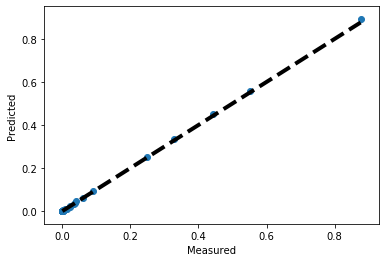

In [43]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()